RANTEST performs a randomisation test to compare two independent samples.  According to the null hypothesis of    no-difference, each outcome would have been the same regardless of which group the individual happened to be allocated to.  Therefore all N = n1 + n2 observations are pooled and, as in the actual experiment, divided at random into groups of size n1 and n2.  The fraction of randomisations that gives rise to a difference between the groups at least as large as that observed gives the P value.

In the binomial case, in which the measurement is the fraction of 'successes' in each sample (say r1 out of n1, and r2 out of n2) a 'success' is given a score of 1, 'failure' scores 0.
Randomisation test on binomial data could be done using as criterion: 
(1) number of successes in set 1 (r1) or 
(2) difference between the p=r/n values.
Both criteria give the same one-tail P value. Use of r1 as criterion is the direct Monte Carlo equivalent of summing the the exact Fisher test probabilities for the observed 2x2 table with those for all tables that depart further from the null hypothesis in the observed direction. A 2-tail probablilty can be found by doubling the one-tail value, at least if the displayed distribution is symmetrical. Use of (p1-p2) as criterion gives both one and two-tail     probabilities directly by seeing how many random allocations of the observations to groups of size n1 and n2 produce and absolute value of (p1-p2) at least as big as that observed.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import sys
import math
import random
import numpy as np

In [3]:
#from dcstats.rantest import RantestBinomial
from dcstats.basic_stats import TTestBinomial

In [4]:
class RantestBinomial():
    def __init__(self, ir1, if1, ir2, if2):
        """ 
        Parameters
        ----------
        ir1 : number of successes in first trial, int
        if1 : number of failures in first trial, int
        ir2 : number of successes in second trial, int
        if2 : number of failures in second trial, int       
        """
        self.ir1, self.if1 = ir1, if1
        self.ir2, self.if2 = ir2, if2
        self.ir = ir1 + ir2
        self.n1 = ir1 + if1 # tot number of tests in first trial 
        self.n2 = ir2 + if2 # tot number of tests in second trial
        self.dobs = ir1 / float(self.n1) - ir2 / float(self.n2)
        random.seed(1984)
        
    def run_rantest(self, nran):
        self.nran = nran
        self.randiff = np.zeros(nran) 
        allobs = [1]*self.ir1 + [0]*self.if1 + [1]*self.ir2 + [0]*self.if2
        for k in range(0, self.nran):
            if sys.version_info[0] < 3: # this if is needed for Python backward compatibility 
                iran = range(0,(self.n1 + self.n2))
            else:
                iran = list(range(self.n1 + self.n2))
            random.shuffle(iran)
            # number of success in randomised second trial
            is2 = [allobs[i] for i in iran[self.n1:]].count(1)
            self.randiff[k] = (self.ir - is2) / float(self.n1) - is2 / float(self.n2) # difference between means
            
        self.ng1 = self.randiff[self.randiff >= self.dobs].size
        self.ne1 = self.randiff[self.randiff == self.dobs].size
        self.nl1 = self.randiff[self.randiff <= self.dobs].size
        
    def __repr__(self):        
        return ('\n\n Rantest:  {0:d} randomisations:'.format(self.nran) +
            '\n P values for difference between sets are:' +
            '\n  r1 greater than or equal to observed: P = {0:.6f}'.format(self.ng1 / float(self.nran)) +
            '\n  r1 less than or equal to observed: P = {0:.6f}'.format(self.nl1 / float(self.nran)) +
            '\n  r1 equal to observed: number = {0:d} (P = {1:.6f})'.format(self.ne1, self.ne1 / float(self.nran)))


In [5]:
ir1, if1 = 3, 4 # Number of successes and failures in trial 1
ir2, if2 = 4, 5 # Number of successes and failures in trial 2

In [6]:
nran = 50000
rnt = RantestBinomial(ir1, if1, ir2, if2)
rnt.run_rantest(nran)
print(rnt)



 Rantest:  50000 randomisations:
 P values for difference between sets are:
  r1 greater than or equal to observed: P = 0.713980
  r1 less than or equal to observed: P = 0.671080
  r1 equal to observed: number = 19253 (P = 0.385060)


Calculate basic statistics

In [7]:
ttb = TTestBinomial(ir1, if1, ir2, if2)

In [8]:
print(ttb)


 Set 1: 3 successes out of 7;
 p1 = 0.428571;   SD(p1) = 0.187044
 Set 2: 4 successes out of 9;
 p2 = 0.444444;   SD(p2) = 0.165635
 Observed difference between sets, p1-p2 = -0.015873

 Observed 2x2 table:
  Set 1:    3      4      7
  Set 2:    4      5      9
  Total:    7      9      16

 Two-sample unpaired test using Gaussian approximation to binomial:
 standard normal deviate = 0.063492; two tail P = 0.949375.


Run randomisation tests

In [9]:
nran = 50000
rnt = RantestBinomial(ir1, if1, ir2, if2)
rnt.run_rantest(nran)

In [10]:
print(rnt)



 Rantest:  50000 randomisations:
 P values for difference between sets are:
  r1 greater than or equal to observed: P = 0.713980
  r1 less than or equal to observed: P = 0.671080
  r1 equal to observed: number = 19253 (P = 0.385060)


AttributeError: 'RantestBinomial' object has no attribute 'randis1'

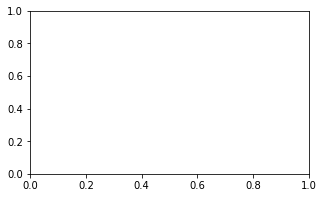

In [11]:
fig, ax  = plt.subplots(1,1, figsize=(5,3))
ax.hist(rnt.randis1, 10)
ax.axvline(x=rnt.ir1, color='r')
ax.set_ylabel("Frequency")
ax.set_xlabel('Random number of successes in set')
print('Red line: number of success in first trial')